In [5]:
%matplotlib inline
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torchvision.utils
import numpy as np
import random
from PIL import Image
import torch
from torch.autograd import Variable
import PIL.ImageOps    
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

In [19]:
def imshow(img,text=None,should_save=False):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()    

def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()
    

training_dir = "HackathonIII/Expression_data/Facial_expression_train/"
testing_dir = "HackathonIII/Expression_data/Facial_expression_test/"
train_batch_size = 200
test_batch_size = 10
train_number_epochs = 100

In [29]:
train_data = torchvision.datasets.ImageFolder(training_dir, transform=transforms.Compose([transforms.Resize((224,224)),
                                                                      transforms.ToTensor()
                                                                      ]))
classes = train_data.classes

test_data = torchvision.datasets.ImageFolder(testing_dir, transform=transforms.Compose([transforms.Resize((224,224)),
                                                                      transforms.ToTensor()
                                                                      ]))


In [30]:
from torchvision import transforms


train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=train_batch_size,
                                          shuffle=True,
                                          num_workers=0)

test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=test_batch_size,
                                          shuffle=False,
                                          num_workers=0)

Mini batch size: images - torch.Size([200, 3, 224, 224])  labels -  torch.Size([200])
torch.Size([3, 224, 224]) tensor(4)


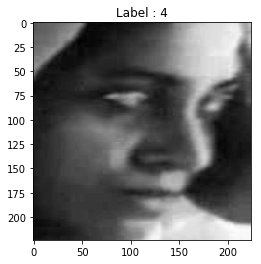

torch.Size([3, 224, 224]) tensor(6)


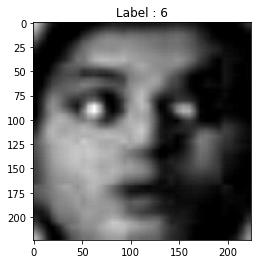

Mini batch size: images - torch.Size([200, 3, 224, 224])  labels -  torch.Size([200])
torch.Size([3, 224, 224]) tensor(4)


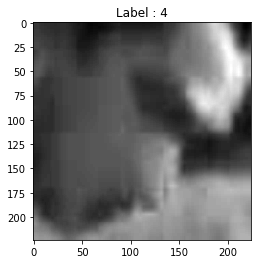

torch.Size([3, 224, 224]) tensor(3)


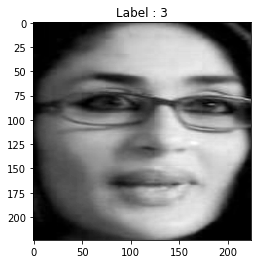

In [31]:
count = 0
for mini_batch in train_loader:
    images, labels = mini_batch
    print('Mini batch size: images -', images.size(), ' labels - ', labels.size())
    for j in range(train_batch_size):
        print(images[j].size(), labels[j])
        plt.imshow(images[j][0].numpy(), cmap='gray')
        plt.title('Label : %i' % labels[j])
        plt.show()

# Some logic to break the loops so that we dont print the whole dataset.
        if j == 1:
            break
    if count == 1:
        break
        
    count +=1

In [37]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.autograd import Variable
vgg16 = models.vgg16(pretrained=True)
modules=list(vgg16.children())[:-2]
vgg16=nn.Sequential(*modules)
for p in vgg16.parameters():
    p.requires_grad = False


In [35]:
for images, labels in train_loader:
    for i in range(images.size()[0]):
        deepimagevec = vgg16.
        print(labels[i].item())

TypeError: eval() takes 1 positional argument but 2 were given

In [ ]:
# The number of times we should iterate over the training data. 1 epoch = 1 pass over the training data
epoch = 20
loss_func = nn.CrossEntropyLoss()

# Set the learning rate
learning_rate = 0.01

optimizer = torch.optim.Adam(lenet.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(lenet.parameters(), lr=learning_rate, momentum=0.0)
# Train Model with train data

loss_history = []

for i in range(epoch):
    print('####### Epoch ', i)
    for j,[image,label] in enumerate(train_loader):
        # You can try with and without using GPUs, by setting this variable before the loop
        #if use_gpu == "cuda":
        image = image.to(device)
        label = label.to(device)
            
        #image = image
        #label = label
        
        
        optimizer.zero_grad() # zero out the gradients from the preivous step 
        predictions = lenet.forward(image) # Do forward pass on the current mini batch
        
        loss = loss_func(predictions, label) # Compute loss on the current mini batch
        loss.backward() # Do backward pass. That is compute all the gradients for the current minibatch
        optimizer.step() # Update the parameters using the gradients with the learning rate
        
        if j % 100 == 0:
            print("loss so far: ", loss.item())
            loss_history.append(loss.item())
                    
        # display.clear_output(wait=True)
    print("batch completed", j)
plt.plot(loss_history)
plt.show()

####### Epoch  0
loss so far:  1.403801679611206
batch completed 90
####### Epoch  1
loss so far:  1.6796417236328125
batch completed 90
####### Epoch  2
loss so far:  1.7339816093444824
batch completed 90
####### Epoch  3
loss so far:  1.7884007692337036
batch completed 90
####### Epoch  4
loss so far:  1.896296739578247
batch completed 90
####### Epoch  5
loss so far:  1.7262002229690552
batch completed 90
####### Epoch  6
loss so far:  1.7705891132354736
batch completed 90
####### Epoch  7
loss so far:  1.7329254150390625


In [87]:
correct = 0.0
total = 0.0
for mini_batch in test_loader:
    images, labels = mini_batch
    
    # You can try with and without using GPUs, by setting this variable before the loop
    #if use_gpu == "cuda":
    images = images.to(device)
    labels = labels.to(device)
        
    #images = images
    
    # Doing the Forward pass
    result = lenet(images)
    
    # Coverting the predictions to probabilities, by applying the softmax function
    result = F.softmax(result)
 
    # Finding the prediction with the largest probability
    _,pred = torch.max(result.data,1)
    
    total += labels.size(0)
    # correct is incremented by the numer of prediction which are correct (equal to the ground truth labels)
    correct += (pred == labels).sum().item()
    
print("Accuracy of Test Data: {0:.2f}%".format(correct/total *100))

/Users/tgupta2/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of Test Data: 36.13%
